In [14]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import metrics
import matplotlib.pyplot as plt

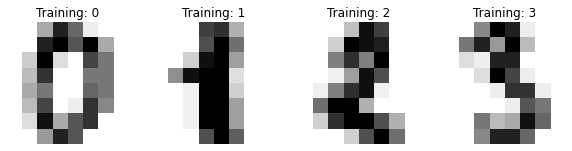

In [15]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [16]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.6, shuffle=False)


In [17]:
from sklearn.neural_network import MLPClassifier
# X = [[0., 0.], [1., 1.]]
# y = [0, 1]
clf = MLPClassifier(solver='adam', alpha=1e-5,
                    hidden_layer_sizes=(1024, 1024, 2048), random_state=1)

clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(1024, 1024, 2048), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [18]:
predicted = clf.predict(X_test)

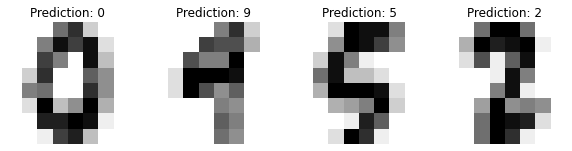

In [19]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [20]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(1024, 1024, 2048), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       105
           1       0.94      0.91      0.93       110
           2       0.94      0.96      0.95       105
           3       0.92      0.90      0.91       109
           4       0.99      0.89      0.94       111
           5       0.93      0.95      0.94       109
           6       0.94      0.98      0.96      

Confusion matrix:
[[104   0   0   0   1   0   0   0   0   0]
 [  0 100   3   2   0   0   0   0   3   2]
 [  0   0 101   3   0   0   0   1   0   0]
 [  0   0   0  98   0   4   0   4   2   1]
 [  0   0   0   0  99   0   5   3   0   4]
 [  0   0   0   0   0 104   1   0   0   4]
 [  1   1   0   0   0   0 107   0   0   0]
 [  0   0   0   1   0   0   0 106   1   0]
 [  0   5   4   2   0   2   1   0  88   2]
 [  0   0   0   1   0   2   0   2   0 104]]


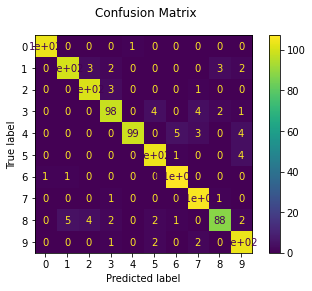

In [21]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()